<a href="https://colab.research.google.com/github/vnewsome/project_voting/blob/main/ML_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Summary**

**Data**

In [1]:
# ONLY RUN IF NEEDED (should be one time)
#! pip3 install mapclassify
#! pip3 install geopandas

In [2]:
# maping related packages
import geopandas as gpd
import mapclassify as mp
from mpl_toolkits.axes_grid1 import make_axes_locatable

# general packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#! git clone https://github.com/vnewsome/project_voting

In [4]:
# From the VA Dept of Emergency Management, get the shapefiles: https://vgin.vdem.virginia.gov/datasets/777890ecdb634d18a02eec604db522c6/about
# From that archive, I uploaded the following files to Colab:
# VirginiaCounty_ClippedToShoreline.cpg
# VirginiaCounty_ClippedToShoreline.dbf
# VirginiaCounty_ClippedToShoreline.prj
# VirginiaCounty_ClippedToShoreline.shp
# VirginiaCounty_ClippedToShoreline.shp.xml
# VirginiaCounty_ClippedToShoreline.shx

In [5]:
# importing data for mapping **CHANGE GDF FILE LOCATION SPECIFIC TO YOUR DIRECTORY**
gdf = gpd.read_file("../voting_shape_data/VirginiaCounty_ClippedToShoreline.shp") # Load Virginia shapefile for maps
cdf = pd.read_csv('data/county_adjacencies.csv') # Load county adjacency data and population data

# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS'])
mapdf = gdf.merge(cdf,left_on='FIPS_left',right_on='FIPS')  # merge county population and adjacency data into df
del gdf, cdf

In [6]:
# summary of this code chuck:
# importing necessary libraries and storing the data in "votingdf"
# reading demographic data from three separate CSV representing different time periods: 2008-2012, 2012-2016, 2016-2020
# selecting the first columns and renaming appropriately, dropping the first row
# concatenate the dataframes into a single one "popchardf" and delete temporary files

# importing voting data, may need to add more county data here!
votingdf = pd.read_csv('data/voting_VA.csv') # Load historical voting data

# get listed columns/variables from the file and rename them, and drop the first row
# looking at population, sex, race, education, and median household income
list1 = ['YEAR','STATE','COUNTY','QSEE001','QSEE002','QSEE026','QSQE002','QSQE003','QSQE004','QSQE005','QSQE006','QSQE007','QSQE008','QUSE002','QUSE017','QUSE018','QUSE019','QUSE020','QUSE021','QUSE022','QUSE023','QUSE024','QUSE025','QU1E001']
df1 = pd.read_csv('data/county_data/0002_ds191_20125_county_E.csv',usecols=list1,encoding = "ISO-8859-1",low_memory=False) # 2008-2012 demographic data by area
df1 = df1.rename({'YEAR':'year','STATE':'state','COUNTY':'county','QSEE001':'population','QSEE002':'male pop','QSEE026':'female pop','QSQE002':'white','QSQE003':'black','QSQE004':'native american','QSQE005':'asian','QSQE006':'pacific islander','QSQE007':'other','QSQE008':'two or more','QUSE002':'no school','QUSE017':'high school diploma','QUSE018':'GED equivalent','QUSE019':'<1 year college','QUSE020':'>1 year college','QUSE021':'associates','QUSE022':'bachelors','QUSE023':'masters','QUSE024':'professional','QUSE025':'doctorate','QU1E001':'median household income'}, axis='columns')
df1 = df1.iloc[1: , :]

list2 = ['YEAR','STATE','COUNTY','AF2AE001','AF2AE002','AF2AE026','AF2ME002','AF2ME003','AF2ME004','AF2ME005','AF2ME006','AF2ME007','AF2ME008','AF4OE002','AF4OE017','AF4OE018','AF4OE019','AF4OE020','AF4OE021','AF4OE022','AF4OE023','AF4OE024','AF4OE025','AF49E001']
df2 = pd.read_csv('data/county_data/0002_ds225_20165_county_E.csv',usecols=list2,encoding = "ISO-8859-1",low_memory=False) # 2012-2016 demographic data by area
df2 = df2.rename({'YEAR':'year','STATE':'state','COUNTY':'county','AF2AE001':'population','AF2AE002':'male pop','AF2AE026':'female pop','AF2ME002':'white','AF2ME003':'black','AF2ME004':'native american','AF2ME005':'asian','AF2ME006':'pacific islander','AF2ME007':'other','AF2ME008':'two or more','AF4OE002':'no school','AF4OE017':'high school diploma','AF4OE018':'GED equivalent','AF4OE019':'<1 year college','AF4OE020':'>1 year college','AF4OE021':'associates','AF4OE022':'bachelors','AF4OE023':'masters','AF4OE024':'professional','AF4OE025':'doctorate','AF49E001':'median household income'}, axis='columns')
df2 = df2.iloc[1: , :]

list3 = ['YEAR','STATE','COUNTY','AMPKE001','AMPKE002','AMPKE026','AMPWE002','AMPWE003','AMPWE004','AMPWE005','AMPWE006','AMPWE007','AMPWE008','AMRZE002','AMRZE017','AMRZE018','AMRZE019','AMRZE020','AMRZE021','AMRZE022','AMRZE023','AMRZE024','AMRZE025','AMR8E001']
df3 = pd.read_csv('data/county_data/0002_ds249_20205_county_E.csv',usecols=list3,encoding = "ISO-8859-1",low_memory=False) # 2016-2020 demographic data by area
df3 = df3.rename({'YEAR':'year','STATE':'state','COUNTY':'county','AMPKE001':'population','AMPKE002':'male pop','AMPKE026':'female pop','AMPWE002':'white','AMPWE003':'black','AMPWE004':'native american','AMPWE005':'asian','AMPWE006':'pacific islander','AMPWE007':'other','AMPWE008':'two or more','AMRZE002':'no school','AMRZE017':'high school diploma','AMRZE018':'GED equivalent','AMRZE019':'<1 year college','AMRZE020':'>1 year college','AMRZE021':'associates','AMRZE022':'bachelors','AMRZE023':'masters','AMRZE024':'professional','AMRZE025':'doctorate','AMR8E001':'median household income'}, axis='columns')
df3 = df3.iloc[1: , :]

# combines data from 3 files into one dataframe
frames = [df1,df2,df3]
popchardf = pd.concat(frames)
del df1, df2, df3

In [7]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    display(popchardf)

,year,state,county,population,male pop,female pop,white,black,native american,asian,pacific islander,other,two or more,no school,high school diploma,GED equivalent,<1 year college,>1 year college,associates,bachelors,masters,professional,doctorate,median household income
1,2008-2012,Alabama,Autauga County,54590,26538,28052,43084,9880,169,439,0,212,806,636,9686,2188,2410,5332,2667,5085,1878,415,251,53773
2,2008-2012,Alabama,Baldwin County,183226,89270,93956,158259,17016,1038,1347,4,2645,2917,736,30682,5993,8459,21668,10370,23840,7880,2124,1463,50706
3,2008-2012,Alabama,Barbour County,27469,14749,12720,13448,12645,25,212,0,570,569,466,5095,1225,956,2564,1372,1613,839,224,81,31889
4,2008-2012,Alabama,Bibb County,22769,12154,10615,17459,4953,80,25,0,9,243,337,5694,763,675,2327,961,928,335,84,49,36824
5,2008-2012,Alabama,Blount County,57466,28489,28977,54507,754,230,97,0,1019,859,549,10875,3119,2509,5219,2770,3137,1210,334,111,45192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,2016-2020,Puerto Rico,Vega Baja Municipio,51089,24420,26669,37840,2473,47,8,1,6222,4498,892,9644,815,581,3802,4167,5707,1776,182,283,20126
3218,2016-2020,Puerto Rico,Vieques Municipio,8508,4356,4152,3775,854,9,14,0,3645,211,244,2523,203,0,169,566,434,141,0,207,14040
3219,2016-2020,Puerto Rico,Villalba Municipio,21899,10589,11310,12216,944,0,0,0,2217,6522,310,5275,349,328,1362,1520,2413,474,51,32,19355
3220,2016-2020,Puerto Rico,Yabucoa Municipio,32867,15883,16984,4473,22270,0,0,0,5463,661,479,5634,506,224,3657,2847,3567,490,44,85,16828


In [50]:
votingdf.head()

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL


In [51]:
votingdf.describe()

,Unnamed: 0,year,county_fips,candidatevotes,totalvotes,version
count,3736.000000,3736.000000,3736.000000,3736.000000,3736.000000,3736.0
mean,47061.027837,2012.826552,51264.579229,5878.282120,29116.353587,20220315.0
std,23219.785408,7.589036,270.546458,18452.435802,58562.057257,0.0
min,11161.000000,2000.000000,51001.000000,0.000000,0.000000,20220315.0
25%,21235.750000,2004.000000,51069.000000,59.000000,6741.500000,20220315.0
50%,49016.500000,2016.000000,51139.000000,899.000000,11629.000000,20220315.0
75%,71036.250000,2020.000000,51550.000000,4548.250000,24520.750000,20220315.0
max,71970.000000,2020.000000,51840.000000,355133.000000,601243.000000,20220315.0


<Axes: >

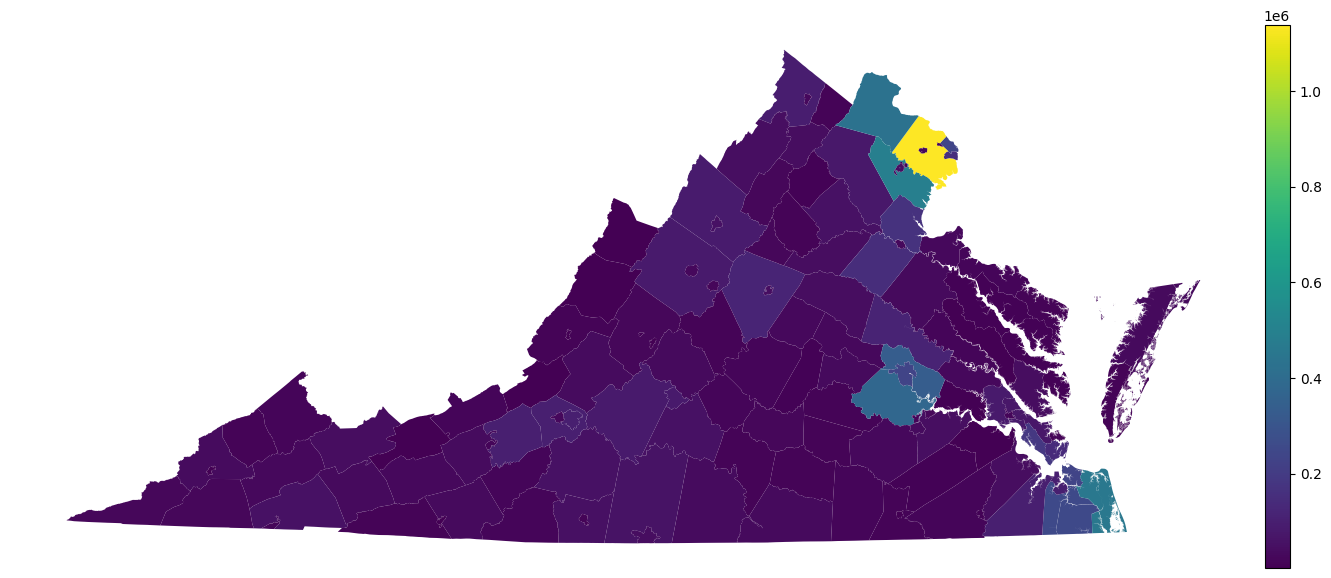

In [52]:
# purely an EXAMPLE taken from the provided code
# Example choropleth map showing 2022 population levels
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
mapdf.plot(ax=ax,column='Population2022',legend=True,cax=cax)

The section above shows how all relevant data was imported and organized. The provided starter code was used to correctly import the Virginia shape files for geopanda mapping. For extra county demographic data, the provided national county data by years was used. The year range looked at is 2008-2020. Of the variables collected, we chose to import the following: population, population by sex, race, education, and median household income. If desired, this information can be used from past elections to see if there are correlations to which way a county votes, and then applied to the upcoming 2024 election. The columns were renamed for easier use, and all columns can be seen in a dataframe above.

After making the dataframe though and exploring some modeling, a problem was encountered. A lot of the demographic data can be coupled with county voting data to find trends and patterns to see how education, race, sex, etc. can predict the majority party a county votes for. However, there is no demographic data for 2024, which means these models cannot be most accurately applied to this year's voting cycle. Recent demographic data was looked for but hard to come by. Instead, we think the best that can be done with this data is train/test splitting it and either applying the model to 2020 demographics or using the model to make general predictions. We can also ignore these demographic data points and just create models based on trends over time, or factor them in a little bit (for example, changes in population continuing on a similar trend over time).

**Results**

We start with the simplest model to make, which is just applying the 2020 voting data to each county in Virginia. With a near-guarantee rematch imminent, this prediction could hold some validity and predictive power.

In [8]:
# Some of the simplest models possible:
# Every county votes for the same candidate as they did in 2020. This is especially relevant with impending Biden vs. Trump rematch

# filter votingdf to only look at VA and US President to get election data
votevadf = votingdf[(votingdf['state_po']=='VA') & (votingdf['office']=='US PRESIDENT')]

# filter to only include data from 2020
# voteva2020df = votevadf[votingdf['year']==2020]
voteva2020df = votevadf[votevadf['year']==2020]

In [9]:
# winning candidate

# summary of this code chuck:
# grouping "voteva2020df" by column "county_fips" and calculates the max of candidate votes for each group
# transform to make sure the result aligns with the original index
# winning_rows = isolates the rows where the winning candidate recieved the highest number of votes for a particular county
# win2020df = creates a new df containing only th erows where the winning candidate received the highest number of votes
# win2020df.reset = resets the index and replacing it with the new one


max_candidatevotes = voteva2020df.groupby('county_fips')['candidatevotes'].transform('max')
winning_rows = voteva2020df[voteva2020df['candidatevotes']==max_candidatevotes]
win2020df = pd.DataFrame(winning_rows)
win2020df.reset_index(drop=True, inplace=True)


# combines map with the data on the winning candidate based on FIPS code
mapwin2020 = mapdf.copy()
mapwin2020 = mapwin2020.merge(win2020df,left_on='FIPS_left',right_on='county_fips')

<Axes: >

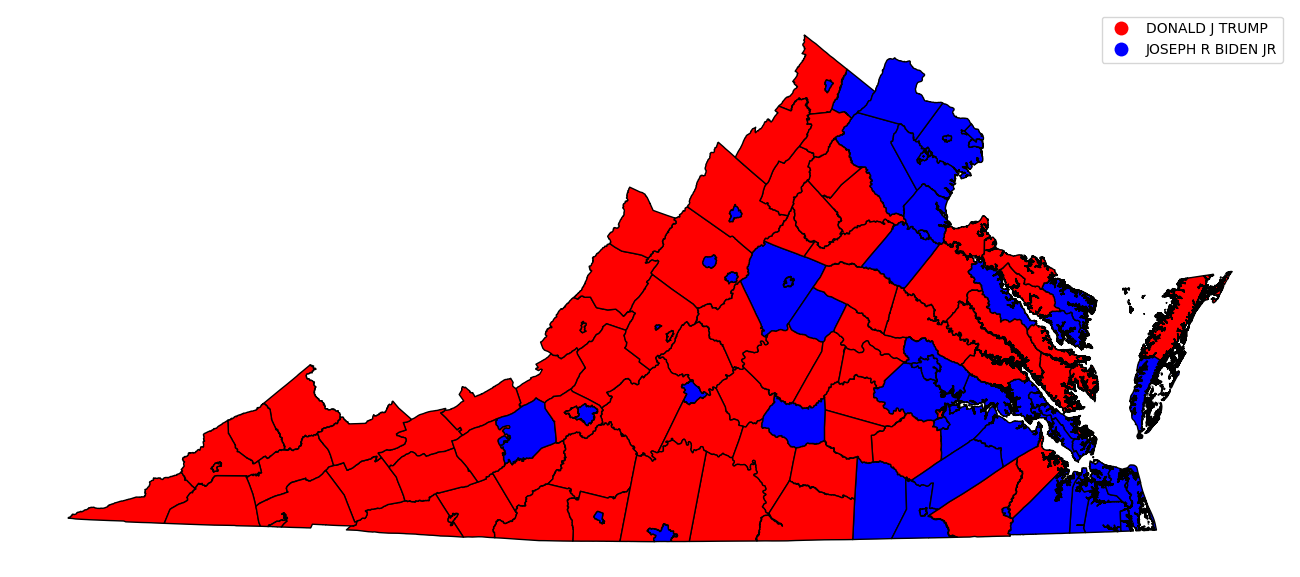

In [10]:
# map
fig = plt.figure()                                           # creates new figure object
ax = fig.add_axes([0, 0, 2, 2])                              # size and position of the axes
divider = make_axes_locatable(ax)                            # creates a divider object
ax.axis('off')                                               # turns off axis lines/ticks since it's not necessary
mapwin2020['candidate'] = win2020df['candidate'].astype(str)      # creates new column and takes values from "candidate" in the above df
mapwin2020.plot(ax=ax,column='candidate',cmap='bwr_r',legend=True,edgecolor='k')    # plots the df onto the axes "ax"

In [11]:
# Every county votes for the candidate from the party with the most wins from 2000-2020. If there is a tie, then the recent party holds tiebreaker.
# winning candidate

# similar to the code above
# group "votevadf" by year and fips code
# isolate the rows of the winning candidate in each county
# win_df = contains the rows where the winning candidate received the highest nunmber of votes in each county
# win_df.reset = resets the index of the df

max_candidatevotes = votevadf.groupby(['year','county_fips'])['candidatevotes'].transform('max')
winning_rows = votevadf[votevadf['candidatevotes']==max_candidatevotes]
win_df = pd.DataFrame(winning_rows)
win_df.reset_index(drop=True, inplace=True)

In [150]:
# total party wins

# counting the number of wins for each party in each county
# arbitrarily, D wins are changed to negative, and the total expresses how balanced votes are (negative leans D, positive leans R)
# OTHER party is negligible compared to the amount of votes for D and R
# merging columns based on fips code
# dropping the no longer necessary columns

county_vote = win_df.groupby(['county_fips', 'party']).size().unstack(fill_value=0)
county_vote['partytotal'] = county_vote['REPUBLICAN'] - county_vote['DEMOCRAT']
county_win = pd.merge(win_df, county_vote, on='county_fips', how='left')
county_win.drop(columns=['DEMOCRAT','OTHER','REPUBLICAN'], inplace=True)

county_win.head()

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode,partytotal
0,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL,6
1,11166,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,18291,36846,20220315,TOTAL,-4
2,11170,2000,VIRGINIA,VA,ALLEGHANY,51005,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,2808,5123,20220315,TOTAL,6
3,11174,2000,VIRGINIA,VA,AMELIA,51007,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,2947,4788,20220315,TOTAL,6
4,11178,2000,VIRGINIA,VA,AMHERST,51009,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6660,11712,20220315,TOTAL,6


In [13]:
mapwin = mapdf.copy()
mapwin = mapwin.merge(county_win,left_on='FIPS_left',right_on='county_fips')

<Axes: >

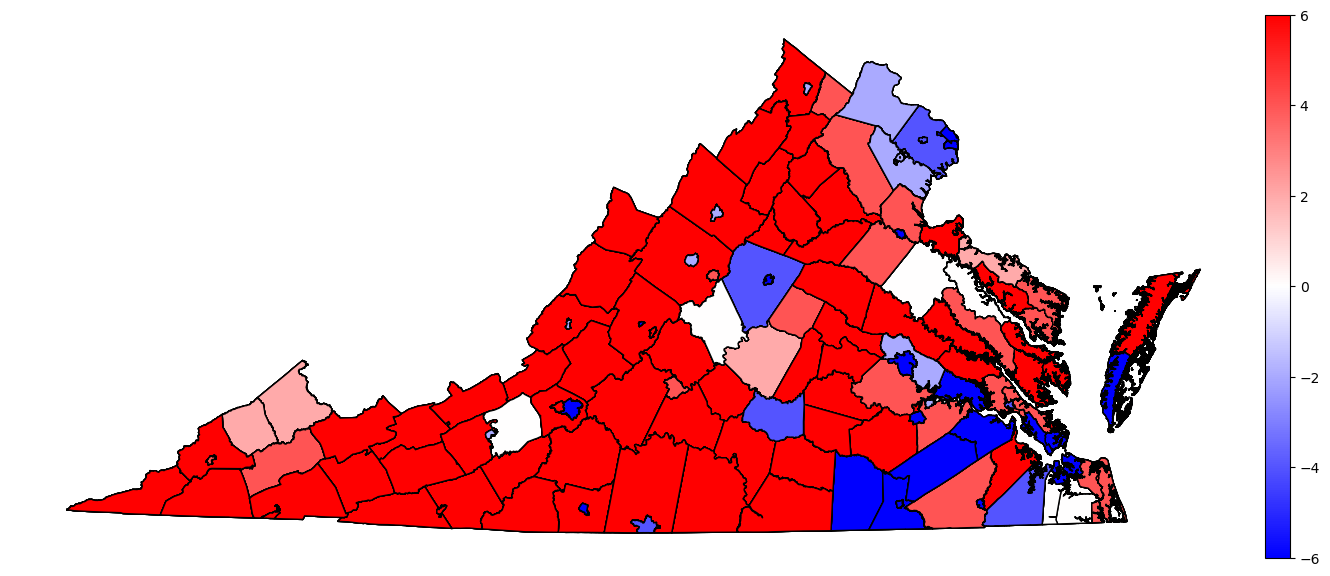

In [14]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
mapwin.plot(ax=ax,column='partytotal',legend=True,cmap='bwr',cax=cax,edgecolor='k')

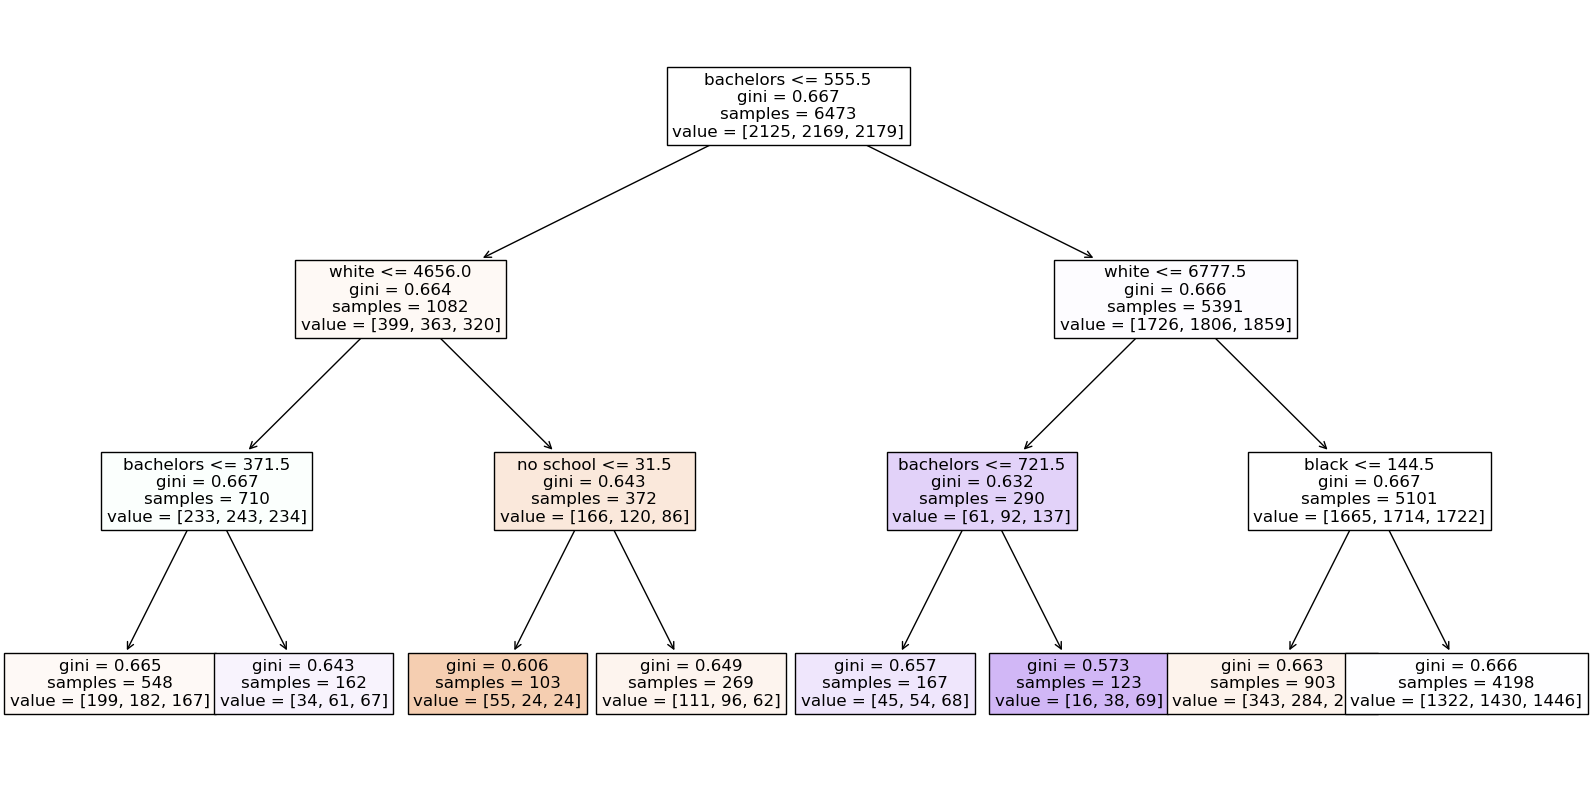

Tree rsq:  0.3586214034361416


In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree

# Process data:
vars = ['white', 'black', 'no school', 'bachelors']
y = popchardf['year']
X = popchardf.loc[:,vars]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



# Fit decision tree:
cart = DecisionTreeClassifier(max_depth=3,min_samples_leaf=100) # Create a classifier object, limit depth to 3 to prevent overbranching
cart = cart.fit(X_train, y_train) # Fit the classifier


# Visualize results:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(cart,filled=True, ax=ax, fontsize = 12,feature_names=vars)
plt.show()

# Compute R-squared error:
X_test = popchardf.loc[:,vars]
y_test = popchardf['year']
y_hat = cart.predict(X_test)

print('Tree rsq: ', cart.score(X_test, y_test)) # R-squared

This section provided three different approaches to the 2024 election. The first map concisely shows which candidate won in each county in the 2020 election, which is relevant given the candidate choices remain the same. The second map uses historical results from the past 6 presidential election cycles, highlighting areas which are "strongholds" for either major party through their consistent selection of that party's candidate. Another striking trend was the flip from Republican to Democrat for multiple counties in Northern and Southeastern Virginia during the 2020 presidential election. The tree uses demographic data pertinent to voting with race and education. It was able to split buckets of likely voters based on these categories, but the R-squared shows it could be improved, perhaps based on different demographics, like population size or income.

In [151]:
vapop = popchardf.loc[popchardf['state'] == 'Virginia']

with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    display(vapop)

,year,state,county,population,male pop,female pop,white,black,native american,asian,pacific islander,other,two or more,no school,high school diploma,GED equivalent,<1 year college,>1 year college,associates,bachelors,masters,professional,doctorate,median household income
2821,2008-2012,Virginia,Accomack County,33454,16230,17224,22586,9620,112,41,0,480,615,193,8220,1035,918,3070,1423,2324,1268,340,280,40780
2822,2008-2012,Virginia,Albemarle County,99484,47564,51920,81403,9751,313,4240,0,1027,2750,703,10568,1130,3003,6596,3887,17321,9581,3538,3729,67797
2823,2008-2012,Virginia,Alleghany County,16297,7956,8341,15210,801,6,127,0,10,143,169,3742,603,901,1581,1067,1160,646,65,25,46133
2824,2008-2012,Virginia,Amelia County,12674,6272,6402,9219,3052,117,59,18,16,193,169,3024,409,550,1123,689,946,280,61,0,50596
2825,2008-2012,Virginia,Amherst County,32301,15406,16895,24630,6083,331,196,18,304,739,339,6466,1372,1476,3163,1636,2545,894,117,174,45020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,2016-2020,Virginia,Suffolk city,91383,44185,47198,46250,37869,153,1956,9,1003,4143,686,13394,2738,4133,11700,5648,10899,5801,985,704,79899
2951,2016-2020,Virginia,Virginia Beach city,450882,221526,229356,293359,84851,1238,32057,454,9544,29379,2495,52351,11816,23967,52769,34519,72697,31837,6537,4120,78136
2952,2016-2020,Virginia,Waynesboro city,22300,10850,11450,17890,2797,182,378,95,208,750,391,4189,1027,1057,1755,1100,2510,1364,338,325,43480
2953,2016-2020,Virginia,Williamsburg city,15034,7015,8019,10773,2285,36,997,0,116,827,10,1186,312,468,732,577,1976,1198,334,385,59288


In [ ]:
# consolidates variables (sex, race, education) into a single percentage as a new column
vapop['male pop'] = pd.to_numeric(vapop['male pop'], errors='coerce')
vapop['population'] = pd.to_numeric(vapop['population'], errors='coerce')
vapop['white'] = pd.to_numeric(vapop['white'], errors='coerce')
vapop['bachelors'] = pd.to_numeric(vapop['bachelors'], errors='coerce')
vapop['masters'] = pd.to_numeric(vapop['masters'], errors='coerce')
vapop['professional'] = pd.to_numeric(vapop['professional'], errors='coerce')
vapop['doctorate'] = pd.to_numeric(vapop['doctorate'], errors='coerce')


vapop['percent male'] = vapop[['male pop']].div(vapop['population'], axis=0)
vapop['percent white'] = vapop[['white']].div(vapop['population'], axis=0)
vapop['percent college degree'] = vapop['bachelors'] + vapop['masters'] + vapop['professional'] + vapop['doctorate']
vapop['percent college degree'] = vapop[['percent college degree']].div(vapop['population'], axis=0)

# drops the rest of the unneeded columns for convenience
vapop = vapop.reset_index()
vapop = vapop[['percent male','percent white','percent college degree','median household income']]

# converts vapop years to single election years to match county_win years
vapop = vapop.replace('2008-2012',2012)
vapop = vapop.replace('2012-2016',2016)
vapop = vapop.replace('2016-2020',2020)

In [153]:
# makes the year data coincide with va_pop
county_win = county_win.loc[county_win['year'].isin([2012,2016,2020])]

# keeps only needed columns
county_win = county_win.drop([632,633,634])
county_win = county_win.reset_index()
county_win = county_win[['year','county_name','county_fips','partytotal']]

In [154]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    display(vapop)

,percent male,percent white,percent college degree,median household income
0,0.485144,0.675136,0.125904,40780
1,0.478107,0.818252,0.343462,67797
2,0.488188,0.933301,0.116340,46133
3,0.494871,0.727395,0.101546,50596
4,0.476951,0.762515,0.115476,45020
...,...,...,...,...
395,0.483514,0.506112,0.201230,79899
396,0.491317,0.650634,0.255479,78136
397,0.486547,0.802242,0.203453,43480
398,0.466609,0.716576,0.258946,59288


In [155]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    display(county_win)

,year,county_name,county_fips,partytotal
0,2012,ACCOMACK,51001,6
1,2012,ALBEMARLE,51003,-4
2,2012,ALLEGHANY,51005,6
3,2012,AMELIA,51007,6
4,2012,AMHERST,51009,6
...,...,...,...,...
395,2020,SUFFOLK CITY,51800,-4
396,2020,VIRGINIA BEACH CITY,51810,4
397,2020,WAYNESBORO CITY,51820,4
398,2020,WILLIAMSBURG CITY,51830,-4


In [156]:
# joins data frames
vadata = pd.concat([county_win, vapop], axis=1)

vadata

,year,county_name,county_fips,partytotal,percent male,percent white,percent college degree,median household income
0,2012,ACCOMACK,51001,6,0.485144,0.675136,0.125904,40780
1,2012,ALBEMARLE,51003,-4,0.478107,0.818252,0.343462,67797
2,2012,ALLEGHANY,51005,6,0.488188,0.933301,0.116340,46133
3,2012,AMELIA,51007,6,0.494871,0.727395,0.101546,50596
4,2012,AMHERST,51009,6,0.476951,0.762515,0.115476,45020
...,...,...,...,...,...,...,...,...
395,2020,SUFFOLK CITY,51800,-4,0.483514,0.506112,0.201230,79899
396,2020,VIRGINIA BEACH CITY,51810,4,0.491317,0.650634,0.255479,78136
397,2020,WAYNESBORO CITY,51820,4,0.486547,0.802242,0.203453,43480
398,2020,WILLIAMSBURG CITY,51830,-4,0.466609,0.716576,0.258946,59288


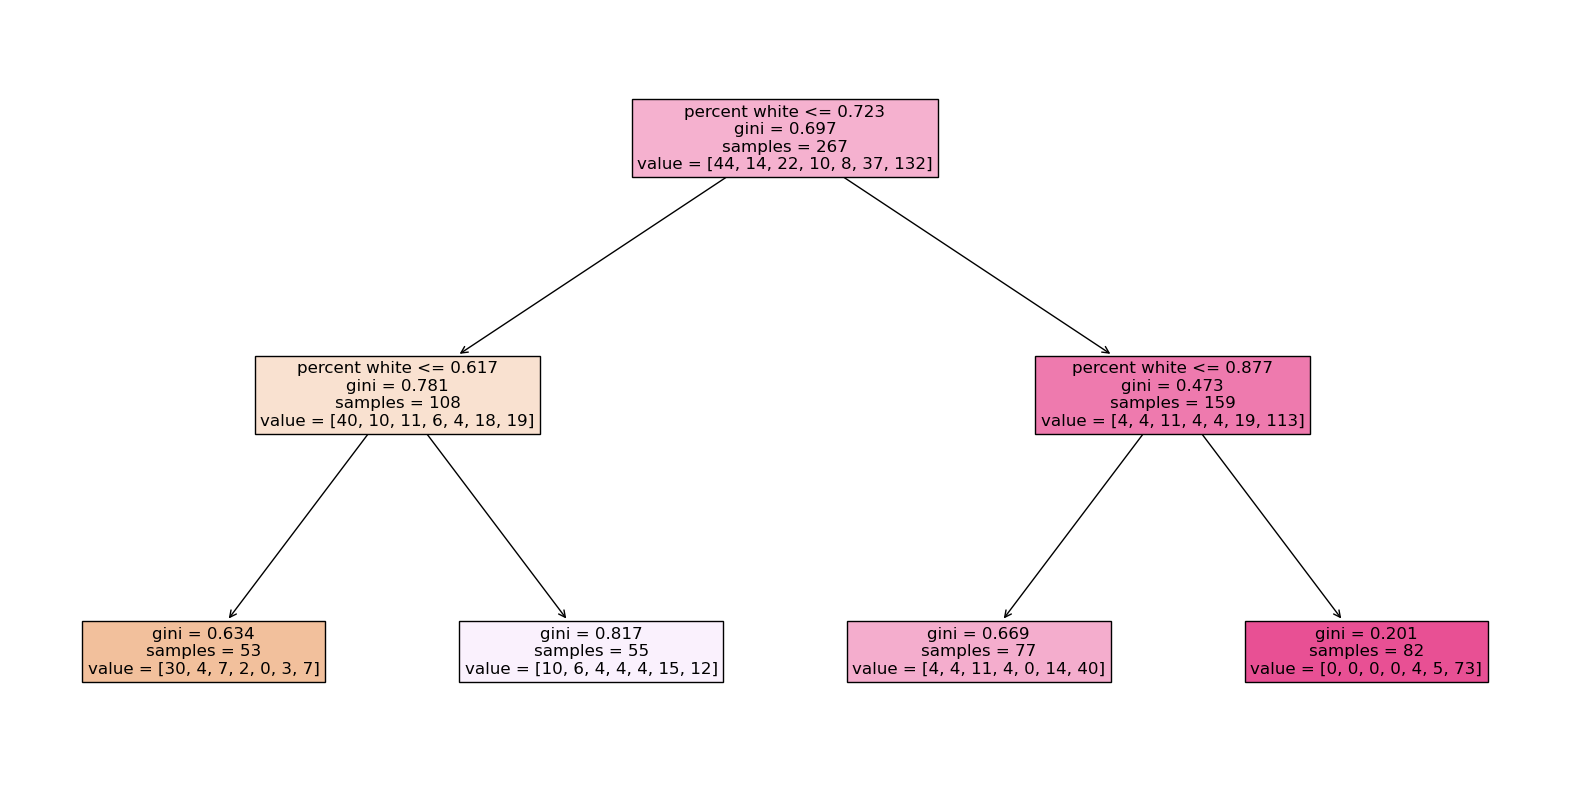

Tree rsq:  0.6165413533834586


In [174]:
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree # Import the tree plotter

# assigns data to testing and training
traindf = vadata.loc[county_win['year'].isin([2012,2016])]
testdf = vadata.loc[vadata['year'] == 2020]
vars = ['year','percent male','percent white','percent college degree','median household income']

X_train = traindf.drop(['county_name','county_fips','partytotal'],axis='columns')
y_train = traindf['partytotal']

X_test = testdf.drop(['county_name','county_fips','partytotal'],axis='columns')
y_test = testdf['partytotal']

# Fit decision tree:
cart = DecisionTreeClassifier(max_depth=3,min_samples_leaf=50) # Create a classifier object, limit depth to 3 to prevent overbranching
cart = cart.fit(X_train, y_train) # Fit the classifier

# Visualize results:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(cart,filled=True, ax=ax, fontsize = 12,feature_names = vars)
plt.show()

# Compute R-squared error:
y_hat = cart.predict(X_test)

print('Tree rsq: ', cart.score(X_test, y_test)) # R-squared

In [175]:
y_hat.shape

(133,)

In [176]:
# join prediction dataframe with info needed for mapping
projectiondf = testdf[['county_name','county_fips']]
projectiondf = projectiondf.reset_index()
prediction = pd.DataFrame(y_hat)

projection = pd.concat([projectiondf, prediction], axis=1)
projection = projection.rename(columns={0: 'partytotal'})

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(projection)

,index,county_name,county_fips,partytotal
0,267,ACCOMACK,51001,4
1,268,ALBEMARLE,51003,6
2,269,ALLEGHANY,51005,6
3,270,AMELIA,51007,6
4,271,AMHERST,51009,6
5,272,APPOMATTOX,51011,6
6,273,ARLINGTON,51013,4
7,274,AUGUSTA,51015,6
8,275,BATH,51017,6
9,276,BEDFORD,51019,6


<Axes: >

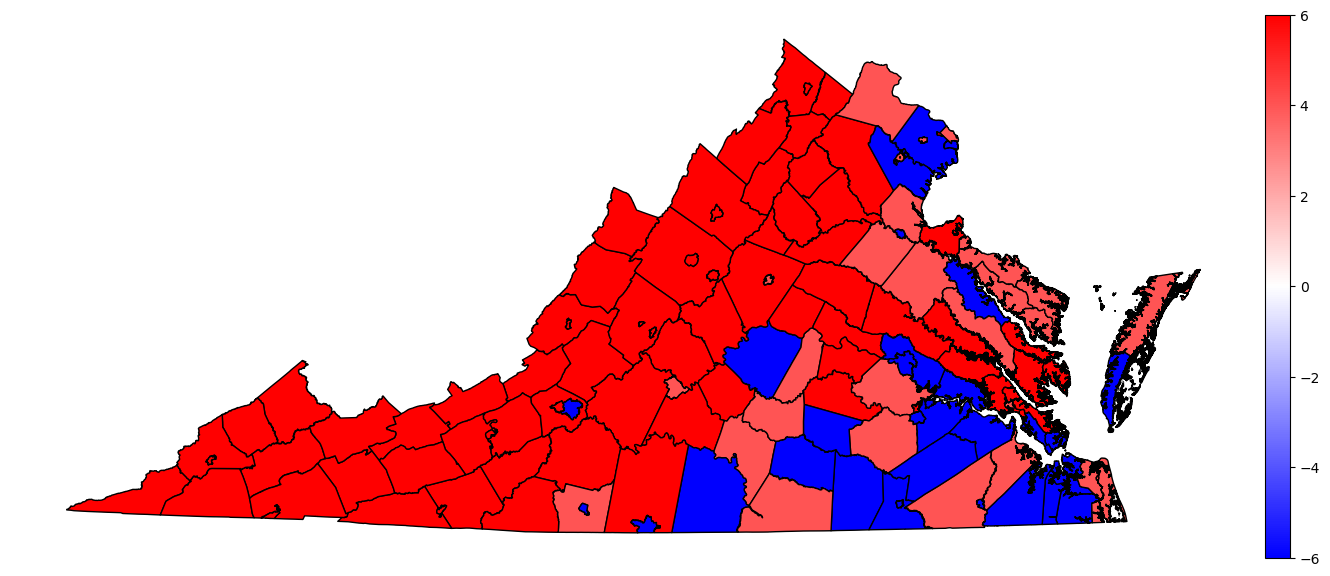

In [177]:
mapwin = mapdf.copy()
mapwin = mapwin.merge(projection,left_on='FIPS_left',right_on='county_fips')

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
mapwin.plot(ax=ax,column='partytotal',legend=True,cmap='bwr',cax=cax,edgecolor='k')

This map is based off of the 2nd decision tree above. The decision tree was made by combining the `partytotal` established above (now unsure how reasonable of a calculation this was) with demographic data from each county across 3 past election years (2012, 2016, 2020). The 2012 and 2016 data was used as training data, while the 2020 data was used for the testing data. This shows similar trends of strong blue strongholds in the Hampton Roads and NOVA areas, although this map shows more blue strongholds in the central south and less around Charlottesville, likely because the political landscape nationally is quite different between the Obama and Trump eras/administrations. Based off the `partytotal` data that was established, and based off the tree predictions, most of the blue counties are `-6` whereas the red counties show a larger variety. Importantly, many of the major population centers show up as democratic even though geographically a majority of the state is republican.

### **Conclusion**

Ultimately, with the nature of political predictions, it is hard to say how accurate these models really are. One of the key factors, both in the making of these models and the efficacy of their predictions, is voter turnout for both parties in every county. If the voter turnout population is different this election cycle than what was used to train the model, it may not be very accurate. Interestingly, all of the maps are relatively similar, which could be interpreted as a positive. However, it is important to note that all of the maps stem from the same root data, so validating them on one another is likely not good practice. In the future, updated data from 2024 (especially demographic data) could help in better applying a prediction. Additionally, more advanced models (LASSOS, random forests) would be great to implement, however, we lacked meaningful experience to effectively apply it to a more complicated dataset/question such as this. The first map made, the 2020 rematch between Biden and Trump, may end up being more accurate than any of the more complicated predictive models. The actual models predicted more polarization (likely based on `partytotal`), which certainly seems to be true based off the media, but may not hold when it comes to the polls. 